# Statcast Data Analysis 

### Hypothesis Testing

#### Spin Rate vs. Swining Strikes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp

---

In [2]:
full_statcast= pd.read_csv("baseball_data/All_statcast.csv")

---

In [3]:
# droping na values and unecessary columns
full_statcast.dropna(inplace=True)
full_statcast.drop(["Unnamed: 0"], axis=1, inplace=True)

### Overall Stats

In [5]:
# max spin rate of all pitches thrown
max_overall_spin_rate = np.max(full_statcast["release_spin_rate"])
#max_overall_spin_rate

# min spin rate of all pitches thrown
min_overall_spin_rate = np.min(full_statcast["release_spin_rate"])
#min_overall_spin_rate

# spin rate mean of all the pitches thrown
overall_spin_rate_mean = np.mean(full_statcast["release_spin_rate"])
#overall_spin_rate_mean

# spin rate mean by pitch type
pitch_spin_rate_mean = full_statcast.groupby("pitch_name")["release_spin_rate"].mean().sort_values(ascending=False)
#pitch_spin_rate_mean

# max spin rate by pitch type
max_spin_rate_pitch = full_statcast.groupby("pitch_name")["release_spin_rate"].max().sort_values(ascending=False)
#max_spin_rate_pitch

# min spin rate by pitch type
min_spin_rate_pitch = full_statcast.groupby("pitch_name")["release_spin_rate"].min().sort_values(ascending=False)
#min_spin_rate_pitch


# count of all outcomes
#full_statcast["description"].value_counts()

### Players General Analysis

In [6]:
# individual player max spin rate
players_max_spin = full_statcast.groupby("player_name")["release_spin_rate"].max().sort_values(ascending=False)
#players_max_spin

# individual player min spin rate
players_min_spin = full_statcast.groupby("player_name")["release_spin_rate"].min().sort_values(ascending=False)
#players_min_spin

# individual player min spin rate
players_min_spin = full_statcast.groupby("player_name")["release_spin_rate"].min().sort_values(ascending=False)
#players_min_spin

# individual player max spin rate by pitch type
player_pitch_max_spin = full_statcast.groupby(['player_name','pitch_name'])["release_spin_rate"].max()
#player_pitch_max_spin

# individual player min spin rate by pitch type
player_pitch_min_spin = full_statcast.groupby(['player_name','pitch_name'])["release_spin_rate"].min()
#player_pitch_min_spin

# individual player mean spin rate by pitch type
player_pitch_mean_spin = full_statcast.groupby(['player_name','pitch_name'])["release_spin_rate"].mean()
#player_pitch_mean_spin

### No Wiff Pitches

In [7]:
# new df with pitches that didn´t produced a wiff
no_wiff = full_statcast[full_statcast["description"].isin(["hit_into_play", "hit_into_play_score", "hit_into_play_no_out"])]

# mean spin rate for pitches that didn´t produce a wiff
no_wiff_mean_spin = no_wiff["release_spin_rate"].mean()
#no_wiff_mean_spin

# total number of pitches that didn´t produce a wiff
total_no_wiff = no_wiff["release_spin_rate"].count()
#total_no_wiff

# new df with just the pitches that produced a wiff
wiffs = full_statcast[full_statcast["description"].isin(["swinging_strike", "swinging_strike_blocked"])]

# total number of pitches that produced a wiff
wiffs["release_spin_rate"].count()

# cleaning data, updating values
wiffs = wiffs.replace("Knuckleball", "Knuckle Ball")
wiffs = wiffs.replace("Split-Finger", "Split Finger")

### Wiff Pitches

In [8]:
# mean of all the pitches that produced a wiff
total_wiffs_mean = wiffs["release_spin_rate"].mean()
#print(f"Total Wiffs Mean: {total_wiffs_mean}")

# total number of pitches that produced a wiff that have a spin rate above the mean spin rate
total_wiff_pitches_high = wiffs[wiffs["release_spin_rate"] > 2251.052892013279].count()
#print(f"Total Wiffs Above Mean: {total_wiff_pitches_high}")

# total number of pitches that produced a wiff that have a spin rate below the mean spin rate
total_wiff_pitches_low = wiffs[wiffs["release_spin_rate"] < 2251.052892013279].count()
#print(f"Total Wiffs Below Mean: {total_wiff_pitches_low}") 

In [9]:
# NEW DF WITH MEAN BY PITCH TYPE FOR WIFF AND NON-WIFF 

# mean spin rate for pitches that didn´t produce a wiff
in_play_spin_mean = pd.DataFrame(no_wiff.groupby("pitch_name")["release_spin_rate"].mean()).reset_index()

# re-naming columns
in_play_spin_mean = in_play_spin_mean.rename(columns = {"pitch_name": "in_play_pitch_name",
                                            "release_spin_rate": "in_play_spin_rate"})

# mean spin rate for pitches that produced a wiff
wiffs_spin_mean = pd.DataFrame(wiffs.groupby("pitch_name")["release_spin_rate"].mean()).reset_index()
wiffs_spin_mean = wiffs_spin_mean.rename(columns = {"pitch_name": "wiff_pitch_name",
                                            "release_spin_rate": "wiff_spin_rate"})

# new df with the mean spin rate for pitches that produced a wiff and pitches that didn´t
all_mean_spins = pd.concat([wiffs_spin_mean, in_play_spin_mean], axis=1, sort=False)

#new column, spin rate difference
all_mean_spins["spin_rate_diff_(wiff-play)"] = all_mean_spins["wiff_spin_rate"] - all_mean_spins["in_play_spin_rate"]
all_mean_spins["spin_rate_diff_(play-wiff)"] = all_mean_spins["in_play_spin_rate"] - all_mean_spins["wiff_spin_rate"]

#new total column 
all_mean_spins["total_spin"] = all_mean_spins[["wiff_spin_rate", "in_play_spin_rate"]].sum(axis=1) 

---

## 2019 Statcast Data Analysis

In [10]:
statcast_2019 = pd.read_csv("baseball_data/clean_statcast_19.csv")

In [11]:
# data cleaning 
statcast_2019.dropna(inplace=True)
statcast_2019.drop(["Unnamed: 0"], axis=1, inplace=True)
statcast_2019.drop(statcast_2019[statcast_2019.pitch_name.isin(["Eephus", "Forkball", "Knuckle Ball"])].index, inplace=True)
statcast_2019 = statcast_2019.replace("2-Seam Fastball", "Sinker")
statcast_2019.drop(statcast_2019[statcast_2019.description.isin(["ball", "foul", "called_strike", "hit_by_pitch", "blocked_ball", "foul_bunt", "missed_bunt", "pitchout", "bunt_foul_tip"])].index, inplace=True)

In [12]:
# functions to create a new column based on multiple conditions from another column

# pitch category column
def conditions(s):
    if (s["pitch_name"] == "4-Seam Fastball") or (s["pitch_name"] == "Cutter") or (s["pitch_name"] == "Sinker"):
        return "Fastballs"
    elif (s["pitch_name"] == "Curveball") or (s["pitch_name"] == "Knuckle Curve") or (s["pitch_name"] == "Slider"):
        return "Breaking Balls"
    else:
        return "Offspeed"

# outcome column
def outcomes(o):
    if (o["description"] == "hit_into_play") or (o["description"] == "hit_into_play_no_out") or (o["description"] == "hit_into_play_score"):
        return "in_play"
    else:
        return "swinging_strike"
    
# new columns, applying the functions created above    
statcast_2019["pitch_category"] = statcast_2019.apply(conditions, axis=1)
statcast_2019["outcome"] = statcast_2019.apply(outcomes, axis=1)

# new column with values 1 and 0 for swing or in_play
statcast_2019["outcome_val"] = np.where(statcast_2019["outcome"] == "swinging_strike", 1, 0)

In [13]:
# mean speed by outcome
outcome_speed_mean = statcast_2019.groupby("outcome")["release_speed"].mean()
#outcome_speed_mean

# mean spin by outcome
outcome_spin_mean = statcast_2019.groupby("outcome")["release_spin_rate"].mean()
#outcome_spin_mean

# standard deviation by outcome
outcome_std = statcast_2019.groupby("outcome")["release_speed"].std()
#outcome_std

# mean speed by outcome and pitch category 
outcome_mean_speed_pitch = statcast_2019.groupby(["pitch_category", "outcome"])["release_speed"].mean()
#outcome_mean_speed_pitch

# mean spin rate by outcome and pitch category
outcome_mean_spin_pitch = statcast_2019.groupby(["pitch_category", "outcome"])["release_spin_rate"].mean()
#outcome_mean_spin_pitch

---

### Plots

<AxesSubplot:xlabel='release_speed', ylabel='release_spin_rate'>

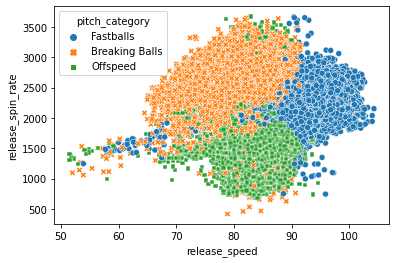

In [18]:
sns.scatterplot(data=statcast_2019, x="release_speed", y="release_spin_rate", hue="pitch_category", style="pitch_category")

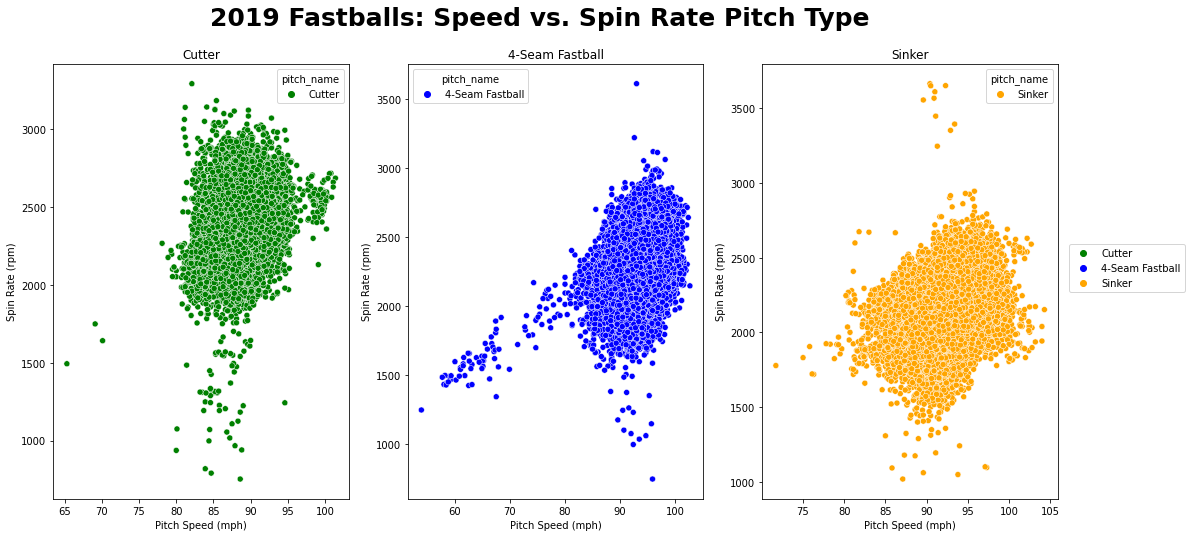

In [19]:
# subsetting each Fastball pitch type
cutter = statcast_2019[(statcast_2019['pitch_category']=="Fastballs") & (statcast_2019['pitch_name']=="Cutter")]
sf4 = statcast_2019[(statcast_2019['pitch_category']=="Fastballs") & (statcast_2019['pitch_name']=="4-Seam Fastball")]
sinker = statcast_2019[(statcast_2019['pitch_category']=="Fastballs") & (statcast_2019['pitch_name']=="Sinker")]

# plotting each fastball type 
fig2, axes2 = plt.subplots(1, 3, figsize = (18,8))
#
sns.scatterplot(data=cutter, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[0], palette=["green"])
axes2[0].set_title("Cutter")
axes2[0].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
sns.scatterplot(data=sf4, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[1], palette=["blue"])
axes2[1].set_title("4-Seam Fastball")
axes2[1].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
sns.scatterplot(data=sinker, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[2], palette=["orange"])
axes2[2].set_title("Sinker")
axes2[2].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
fig2.suptitle("2019 Fastballs: Speed vs. Spin Rate Pitch Type", fontsize = 25, fontweight="bold")
fig2.legend(loc="center right")

Text(0.5, 0.98, '2019 Fastballs: Speed vs. Spin Rate Pitch Type')

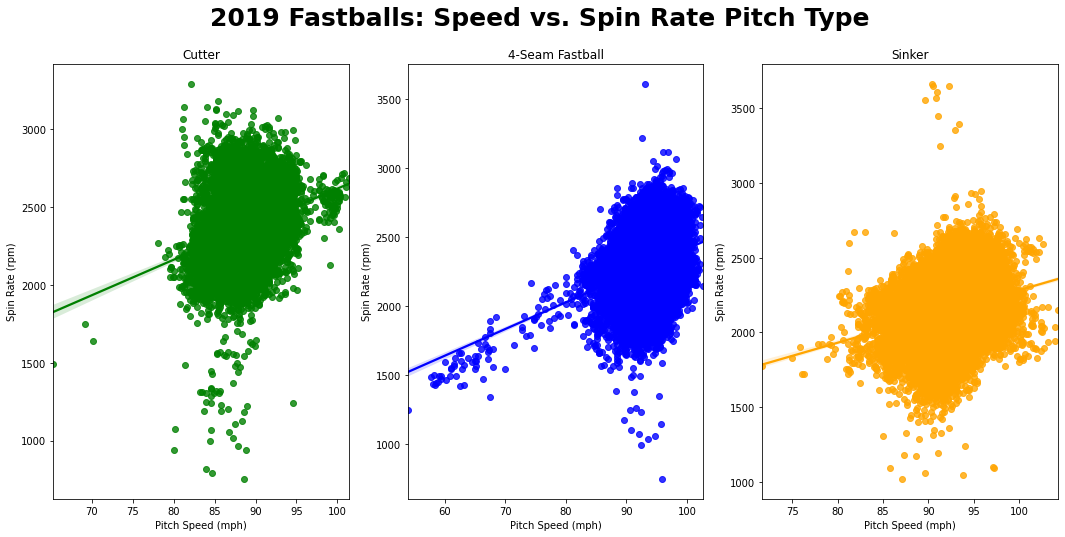

In [20]:
# plotting each fastball type 
fig2, axes2 = plt.subplots(1, 3, figsize = (18,8))
#
sns.regplot(data=cutter, x="release_speed", y="release_spin_rate", ax = axes2[0], ci=100, color="green")
axes2[0].set_title("Cutter")
axes2[0].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")

#
sns.regplot(data=sf4, x="release_speed", y="release_spin_rate", ax = axes2[1], ci=100, color="blue")
axes2[1].set_title("4-Seam Fastball")
axes2[1].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
sns.regplot(data=sinker, x="release_speed", y="release_spin_rate", ax = axes2[2], ci=100, color="orange")
axes2[2].set_title("Sinker")
axes2[2].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
fig2.suptitle("2019 Fastballs: Speed vs. Spin Rate Pitch Type", fontsize = 25, fontweight="bold")

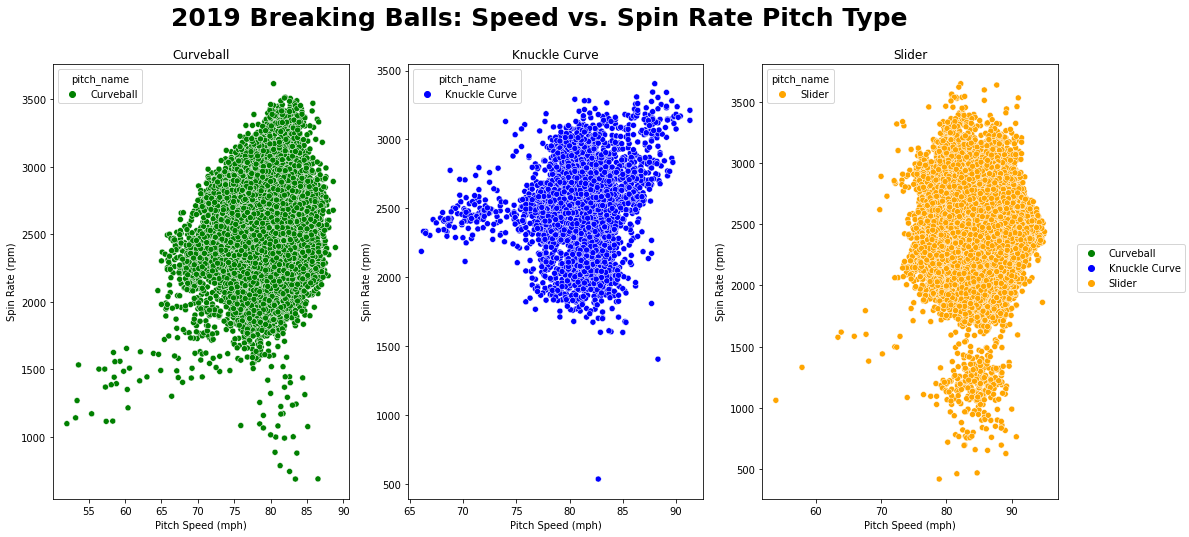

In [21]:
# subsetting each Fastball pitch type
curveball = statcast_2019[(statcast_2019['pitch_category']=="Breaking Balls") & (statcast_2019['pitch_name']=="Curveball")]
knuckle_curve = statcast_2019[(statcast_2019['pitch_category']=="Breaking Balls") & (statcast_2019['pitch_name']=="Knuckle Curve")]
slider = statcast_2019[(statcast_2019['pitch_category']=="Breaking Balls") & (statcast_2019['pitch_name']=="Slider")]

# plotting each fastball type 
fig2, axes2 = plt.subplots(1, 3, figsize = (18,8))
#
sns.scatterplot(data=curveball, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[0], palette=["green"])
axes2[0].set_title("Curveball")
axes2[0].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")

#
sns.scatterplot(data=knuckle_curve, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[1], palette=["blue"])
axes2[1].set_title("Knuckle Curve")
axes2[1].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
sns.scatterplot(data=slider, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[2], palette=["orange"])
axes2[2].set_title("Slider")
axes2[2].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
fig2.suptitle("2019 Breaking Balls: Speed vs. Spin Rate Pitch Type", fontsize = 25, fontweight="bold")
fig2.legend(loc="center right")

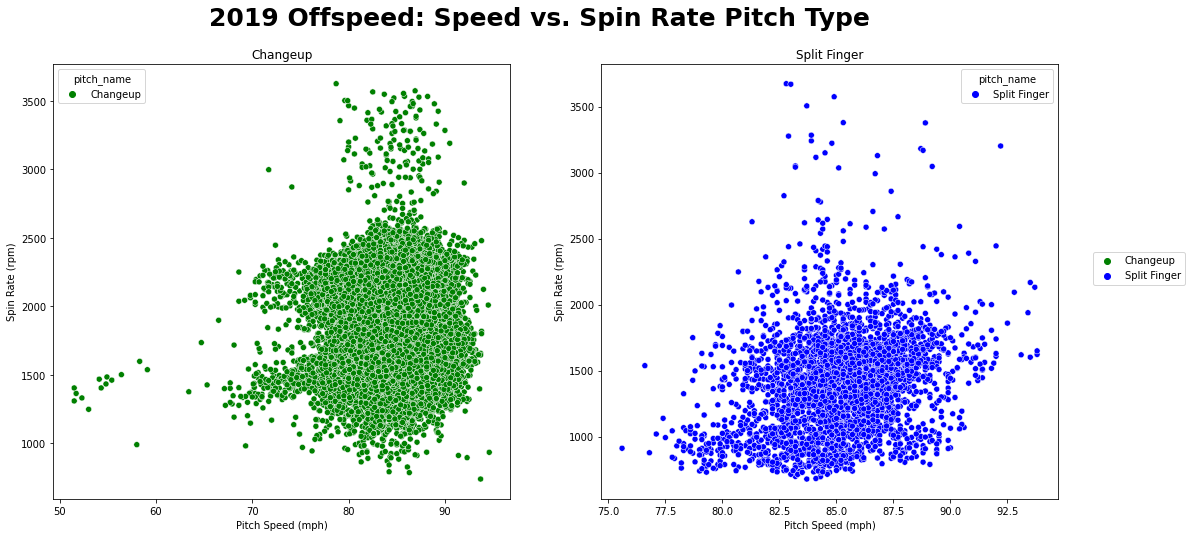

In [22]:
# subsetting each Fastball pitch type
changeup = statcast_2019[(statcast_2019['pitch_category']=="Offspeed") & (statcast_2019['pitch_name']=="Changeup")]
split_finger = statcast_2019[(statcast_2019['pitch_category']=="Offspeed") & (statcast_2019['pitch_name']=="Split Finger")]

# plotting each fastball type 
fig2, axes2 = plt.subplots(1, 2, figsize = (18,8))
#
sns.scatterplot(data=changeup, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[0], palette=["green"])
axes2[0].set_title("Changeup")
axes2[0].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
sns.scatterplot(data=split_finger, x="release_speed", y="release_spin_rate", hue="pitch_name", ax = axes2[1], palette=["blue"])
axes2[1].set_title("Split Finger")
axes2[1].set(xlabel="Pitch Speed (mph)", ylabel = "Spin Rate (rpm)")
#
fig2.suptitle("2019 Offspeed: Speed vs. Spin Rate Pitch Type", fontsize = 25, fontweight="bold")
fig2.legend(loc="center right")


---

### Correlations

In [35]:
# correlation function
def pitchCorrelation(x, y):
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope, intercept, r_value**2, p_value, std_err

##########################################################################

# correlation between release_speed and spin rate
pitchCorrelation(statcast_2019["release_speed"], statcast_2019["release_spin_rate"])

# FASTBALLS 

# cutter correlation between release_speed and spin rate
pitchCorrelation(cutter["release_speed"], cutter["release_spin_rate"])

# 4-seam fastball correlation between release_speed and spin rate
pitchCorrelation(sf4["release_speed"], sf4["release_spin_rate"])

# sinker correlation between release_speed and spin rate
pitchCorrelation(sinker["release_speed"], sinker["release_spin_rate"])

#BREAKING BALLS

# curveball correlation between release_speed and spin rate
pitchCorrelation(curveball["release_speed"], curveball["release_spin_rate"])

# knuckle curve correlation between release_speed and spin rate
pitchCorrelation(knuckle_curve["release_speed"], knuckle_curve["release_spin_rate"])

# slider correlation between release_speed and spin rate
pitchCorrelation(slider["release_speed"], slider["release_spin_rate"])

# OFFSPEED

# changeup correlation between release_speed and spin rate
pitchCorrelation(changeup["release_speed"], changeup["release_spin_rate"])

# splitter correlation between release_speed and spin rate
pitchCorrelation(split_finger["release_speed"], split_finger["release_spin_rate"])

(39.973574163196844,
 -1992.9900926917335,
 0.06653944883306376,
 1.3755997702462073e-55,
 2.501254957882887)

In [24]:
# function to calculate mean, standard deviation and count for the given parameter
def mean_std(parameter):
    parameter_mean = parameter.mean()
    parameter_std = parameter.std()
    parameter_count = parameter.count()

    return parameter_mean, parameter_std, parameter_count

---

### Two Sample Mean Hypothesis Testing

In [37]:
# Spin Rate Mean and Standard Deviation for in_play outcomes

# in play outcomes
spin_in_play = statcast_2019[statcast_2019["outcome"]== "in_play"]
spin_in_play_mean = spin_in_play["release_spin_rate"].mean()
spin_in_play_std = spin_in_play["release_spin_rate"].std()
in_play_spin = spin_in_play["release_spin_rate"]

# swing outcomes
spin_swing = statcast_2019[statcast_2019["outcome"]== "swinging_strike"]
spin_swing_mean = spin_swing["release_spin_rate"].mean()
spin_swing_std = spin_swing["release_spin_rate"].std()
swing_spin = spin_swing["release_spin_rate"]


# hypothesis testing 

# function that returns the two sample hypothesis testing and the confidence intervals
def hypo_test(samp1, samp2):
    
    # hypothesis testing
    hypo_test = stats.ttest_ind(a=samp1, b=samp2)
    # confidence intervals
    swing_confidence = stats.t.interval(0.95, len(samp1) - 1, loc=np.mean(samp1), scale=stats.sem(samp1))
    in_play_confidence = stats.t.interval(0.95, len(samp2) - 1, loc=np.mean(samp2), scale=stats.sem(samp2))
    
    return hypo_test, swing_confidence, in_play_confidence

hypo_test(swing_spin, in_play_spin)

(Ttest_indResult(statistic=27.584384664118033, pvalue=3.442890984956968e-167),
 (2264.580366430541, 2269.4115681079224),
 (2223.5011183090664, 2227.123602154248))

In [40]:
# Velo Mean and Standard Deviation for in_play outcomes

# in play outcomes
speed_in_play = statcast_2019[statcast_2019["outcome"]== "in_play"]
speed_in_play_mean = speed_in_play["release_speed"].mean()
speed_in_play_std = speed_in_play["release_speed"].std()
in_play_speed = speed_in_play["release_speed"]

# swing outcomes
speed_swing = statcast_2019[statcast_2019["outcome"]== "swinging_strike"]
speed_swing_mean = speed_swing["release_speed"].mean()
speed_swing_std = speed_swing["release_speed"].std()
swing_speed = speed_swing["release_speed"]

# hypothesis testing

# function that returns the two sample hypothesis testing and the confidence intervals
def hypo_test(samp1, samp2):
    
    # hypothesis testing
    hypo_test = stats.ttest_ind(a=samp1, b=samp2)
    # confidence intervals
    swing_confidence = stats.t.interval(0.95, len(samp1) - 1, loc=np.mean(samp1), scale=stats.sem(samp1))
    in_play_confidence = stats.t.interval(0.95, len(samp2) - 1, loc=np.mean(samp2), scale=stats.sem(samp2))
    
    return hypo_test, swing_confidence, in_play_confidence

hypo_test(swing_speed, in_play_speed)

(Ttest_indResult(statistic=-30.399091520092075, pvalue=1.5796225373448026e-202),
 (88.03514533250863, 88.11444084366543),
 (88.83221437712263, 88.89684023594947))

In [46]:
pitcher = statcast_2019[statcast_2019["player_name"]== "Daniel Hudson"]

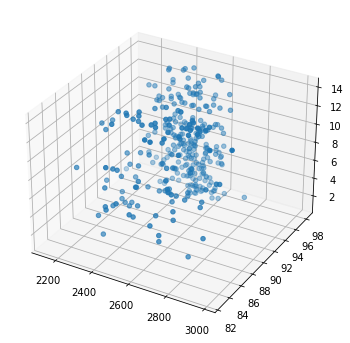

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pitcher["release_spin_rate"], pitcher["release_speed"], pitcher["zone"])
plt.show()